In [37]:
import re
import numpy as np
import matplotlib.pyplot as plt
import copy

# Read System Log

In [38]:
# f = open(r"..\Data\2021-09-11-umbrella-experiment-32run-fran\2021-09-10T185854\2021-09-10T175907_system.log",'r')
f = open(r"../Data/2021-09-11-umbrella-experiment-32run-fran/2021-09-10T185854/2021-09-10T175907_system.log",'r')
raw_system_record_list = f.readlines()
# raw_log_data = f.read()
# print(raw_log_data)
f.close()
print(raw_system_record_list[0])

{"serial":1, "timestamp":1631296747.181, "time":"2021-09-10T185907", "data":{"cpu_times":["scputimes(user=36.1, nice=0.0, system=37.99, idle=536.7, iowait=16.37, irq=0.0, softirq=0.87, steal=0.0, guest=0.0, guest_nice=0.0)"], "cpu_times_percent":["scputimes(user=25.3, nice=0.0, system=13.0, idle=49.2, iowait=12.0, irq=0.0, softirq=0.5, steal=0.0, guest=0.0, guest_nice=0.0)"], "cpu_percent_allcpus":["38.8"], "cpu_percent_percpu":["[51.5, 31.1, 26.6, 46.8]"], "cpu_stats":["scpustats(ctx_switches=299968, interrupts=1407946, soft_interrupts=106226, syscalls=0)"], "cpu_freq":["scpufreq(current=1200.0, min=600.0, max=1200.0)"], "getloadavg":["(0.98, 0.39, 0.15)"], "virtual_memory":["svmem(total=969773056, available=685645824, percent=29.3, used=220786688, free=351244288, active=299393024, inactive=224411648, buffers=35856384, cached=361885696, shared=7368704, slab=70086656)"], "swap_memory":["sswap(total=0, used=0, free=0, percent=0.0, sin=0, sout=0)"], "disk_partitions":["[sdiskpart(device=

In [39]:
class SystemEvent:
    def __init__(self) -> None:
        self.serial = None
        self.timestamp = None
        self.time = None
        self.data = None

        self.data_dict = None
    
    def decode_txt_record(self,txt_record):
        _serial = re.search(r'"serial"\s*:\s*([^,]*),', txt_record).group(1)
        _timestamp = re.search(r'"timestamp"\s*:\s*([^,]*),', txt_record).group(1)
        _time = re.search(r'"time"\s*:\s*([^,]*),', txt_record).group(1)
        _data = re.search(r'"data"\s*:\s*(.*)', txt_record).group(1)

        # phrase the data string
        _data_dict = {}
        for key,val in re.findall(r'"(\w+)"\s*:\s*\["(.*?)"\][,\}]', _data): 
            _data_dict[key] = val
        
        # TODO: do something futher on data value

        self.serial = _serial
        self.timestamp = _timestamp
        self.time = _time
        self.data = _data

        self.data_dict = _data_dict
    


In [40]:
system_event_list = []
for row in raw_system_record_list:
    event = SystemEvent()
    event.decode_txt_record(row)
    system_event_list.append(event)
    print(f"{event.serial} {event.timestamp} {event.time} {len(event.data_dict.keys())}")

1 1631296747.181 "2021-09-10T185907" 19
2 1631296748.267 "2021-09-10T185908" 19
3 1631296749.335 "2021-09-10T185909" 19
4 1631296750.404 "2021-09-10T185910" 19
5 1631296751.490 "2021-09-10T185911" 19
6 1631296752.629 "2021-09-10T185912" 19
7 1631296753.735 "2021-09-10T185913" 19
8 1631296754.812 "2021-09-10T185914" 19
9 1631296755.908 "2021-09-10T185915" 19
10 1631296756.980 "2021-09-10T185916" 19
11 1631296758.072 "2021-09-10T185918" 19
12 1631296759.172 "2021-09-10T185919" 19
13 1631296760.277 "2021-09-10T185920" 19
14 1631296761.375 "2021-09-10T185921" 19
15 1631296762.467 "2021-09-10T185922" 19
16 1631296763.553 "2021-09-10T185923" 19
17 1631296764.634 "2021-09-10T185924" 19
18 1631296765.727 "2021-09-10T185925" 19
19 1631296766.820 "2021-09-10T185926" 19
20 1631296767.912 "2021-09-10T185927" 19
21 1631296769.000 "2021-09-10T185928" 19
22 1631296770.085 "2021-09-10T185930" 19
23 1631296771.177 "2021-09-10T185931" 19
24 1631296772.271 "2021-09-10T185932" 19
25 1631296773.356 "2021-0

# Read Auditd Log

In [41]:
# f = open(r"..\Data\2021-09-11-umbrella-experiment-32run-fran\2021-09-10T185854\2021-09-10T191416_audit.log",'r')
f = open(r"../Data/2021-09-11-umbrella-experiment-32run-fran/2021-09-10T185854/2021-09-10T191416_audit.log",'r')
raw_auditd_record_list = f.readlines()
# raw_log_data = f.read()
# print(raw_log_data)
f.close()
raw_auditd_record_list[0]

'type=DAEMON_START msg=audit(1631295242.947:4489): op=start ver=2.8.4 format=raw kernel=5.4.83-v7+ auid=4294967295 pid=22768 uid=0 ses=4294967295 res=success\n'

In [42]:
class AuditdRecord:
    def __init__(self) -> None:
        self.type = None
        self.timestamp = None
        self.id = None
        self.data = None

        self.data_dict = None
    
    def decode_txt_record(self,txt_record):
        try:
            # _type = re.search(r'type=(\w*)\s', txt_record).group(1)
            # _timestamp,_id,_data = re.search(r'msg=audit\(([^:]*):([^:]*)\):(.*\n)', txt_record).groups()

            # re expression include UNKNOWN[1333]
            _type,_timestamp,_id,_data = re.search(r'type=([^\s]*)\smsg=audit\(([^:]*):([^:]*)\):\s(.*\n)', txt_record).groups()


            # phrase the data string
            data_dict = {}
            for key,val in re.findall(r'(\w+)\s*=\s*(.*?)[\s\n]', _data) :
                data_dict[key] = val
        except:
            print(txt_record)
            raise
        
        # TODO: do something futher on data value

        self.type = _type
        self.timestamp = _timestamp
        self.id = _id
        self.data = _data

        self.data_dict = data_dict
    

In [43]:
auditd_record_list = []
for row in raw_auditd_record_list:
    record = AuditdRecord()
    record.decode_txt_record(row)
    auditd_record_list.append(record)
    print(f"{record.type} {record.timestamp} {record.id} {len(record.data_dict.keys())}")

DAEMON_START 1631295242.947 4489 9
SOCKADDR 1631295242.937 452367 1
PROCTITLE 1631295242.937 452367 1
SYSCALL 1631295242.937 452368 26
EXECVE 1631295242.937 452368 2
CWD 1631295242.937 452368 1
PATH 1631295242.937 452368 14
PATH 1631295242.937 452368 14
PROCTITLE 1631295242.937 452368 1
SYSCALL 1631295242.947 452369 26
PROCTITLE 1631295242.947 452369 1
SYSCALL 1631295242.947 452370 26
PROCTITLE 1631295242.947 452370 1
SYSCALL 1631295242.947 452371 26
PROCTITLE 1631295242.947 452371 1
SYSCALL 1631295242.947 452372 26
PROCTITLE 1631295242.947 452372 1
SYSCALL 1631295242.947 452373 26
PROCTITLE 1631295242.947 452373 1
SYSCALL 1631295242.947 452374 26
PROCTITLE 1631295242.947 452374 1
SYSCALL 1631295242.947 452375 26
PROCTITLE 1631295242.947 452375 1
SYSCALL 1631295242.947 452376 26
PROCTITLE 1631295242.947 452376 1
SYSCALL 1631295242.947 452377 26
PROCTITLE 1631295242.947 452377 1
SYSCALL 1631295242.947 452378 26
PROCTITLE 1631295242.947 452378 1
SYSCALL 1631295242.947 452379 26
PROCTITLE

In [44]:
unitype = sorted(list(set([f"{record.type}:{list(record.data_dict.keys())}" for record in auditd_record_list])))
for item in unitype:
    print(item)

ANOM_PROMISCUOUS:['dev', 'prom', 'old_prom', 'auid', 'uid', 'gid', 'ses']
BPRM_FCAPS:['fver', 'fp', 'fi', 'fe', 'old_pp', 'old_pi', 'old_pe', 'old_pa', 'pp', 'pi', 'pe', 'pa', 'frootid']
CONFIG_CHANGE:['auid', 'ses', 'op', 'key', 'list', 'res']
CONFIG_CHANGE:['op', 'audit_backlog_limit', 'old', 'auid', 'ses', 'res']
CONFIG_CHANGE:['op', 'audit_backlog_wait_time', 'old', 'auid', 'ses', 'res']
CONFIG_CHANGE:['op', 'audit_failure', 'old', 'auid', 'ses', 'res']
CRED_ACQ:['pid', 'uid', 'auid', 'ses', 'msg', 'grantors', 'acct', 'exe', 'hostname', 'addr', 'terminal', 'res']
CRED_DISP:['pid', 'uid', 'auid', 'ses', 'msg', 'grantors', 'acct', 'exe', 'hostname', 'addr', 'terminal', 'res']
CRED_REFR:['pid', 'uid', 'auid', 'ses', 'msg', 'grantors', 'acct', 'exe', 'hostname', 'addr', 'terminal', 'res']
CWD:['cwd']
DAEMON_END:['op', 'auid', 'pid', 'subj', 'res']
DAEMON_END:['op', 'auid', 'pid', 'subj']
DAEMON_START:['op', 'ver', 'format', 'kernel', 'auid', 'pid', 'uid', 'ses', 'res']
EXECVE:['argc', 

In [45]:
for record in auditd_record_list:
    if record.type == "SYSCALL":
        print(record.data_dict['ppid'],record.data_dict['pid'])

22768 22770
22726 22727
22726 22727
22726 22727
22726 22727
22726 22727
1 424
1 424
1 424
1 424
1 438
1 438
1 424
1 438
1 438
1 22772
1 22772
1 22772
1 22772
1 22772
22768 22770
22768 22770
22772 22773
22772 22775
22776 22777
22776 22778
3480 3519
22774 22780
22772 22781
22772 22782
22772 22782
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22783
22772 22

In [46]:
class AuditdNode():
    def __init__(self, nodetype, arg_dict,timestamp) -> None:
        self.nodetype = nodetype
        self.arg_dict = arg_dict
        self.timestamp = timestamp
        self.feature = None

    def feature_extract(self):
        features = []
        features.append(self.nodetype)

        return features
        
    def __str__(self) -> str:
        text = f"{self.nodetype} {self.timestamp} "
        for key in self.arg_dict.keys():
            text += f"{key}:{self.arg_dict[key]} "

        return text

    def __eq__(self, __value: object) -> bool:
        if self.nodetype == __value.nodetype:
            flag_eq = True
            for key in self.arg_dict.keys():
                if key not in __value.arg_dict.keys():
                    flag_eq = False
                    break
                elif self.arg_dict[key] != __value.arg_dict[key]:
                    flag_eq = False
                    break
            return flag_eq
        else:
            return False
    
    def __ne__(self, __value: object) -> bool:
        if self.__eq__(__value):
            return False
        else:
            return True
            


class AuditdEdge():
    def __init__(self, i_a, i_b, edgetype, arg_dict,timestamp) -> None:
        self.i_a = i_a
        self.i_b = i_b
        self.edgetype = edgetype
        self.arg_dict = arg_dict
        self.timestamp = timestamp
    
    def feature_extract(self):
        features = []
        if "syscall" not in self.arg_dict:
            raise AttributeError
        else:
            features.append(self.arg_dict['syscall'])

        return features

    def __str__(self) -> str:
        text = f"{self.i_a} {self.i_b} "
        for key in self.arg_dict.keys():
            text += f"{key}:{self.arg_dict[key]} "
        
        return text

    def __eq__(self, __value: object) -> bool:
        if self.i_a == __value.i_a and self.i_b == __value.i_b and self.edgetype == __value.edgetype:
            flag_eq = True
            for key in self.arg_dict.keys():
                if key not in __value.arg_dict.keys():
                    flag_eq = False
                    break
                elif self.arg_dict[key] != __value.arg_dict[key]:
                    flag_eq = False
                    break
            return flag_eq
        else:
            return False
    
    def __ne__(self, __value: object) -> bool:
        if self.__eq__(__value):
            return False
        else:
            return True

In [47]:
# TODO combine records with same timestamp and id into events
class AuditdEvent:
    def __init__(self, id) -> None:
        self.id = id
        self.records = []
        self.node_list = []
        self.edge_list = []

    def get_timestamp(self,method='min'):
        timestamps = []
        for _record in self.records:
            timestamps.append(float(_record.timestamp))
        if method == 'min':
            return min(timestamps)
        elif method == 'max':
            return max(timestamps)
        else:
            raise AttributeError
    
    # Indentification
    def event_analyse(self):
        self.node_list = []
        self.edge_list = []

        def _add_node(nodetype, arg_dict, timestamp):
            # Duplicate check
            newnode = AuditdNode(nodetype,arg_dict,timestamp)
            for i_node, _node in enumerate(self.node_list):
                if _node == newnode:   
                    return i_node
        
            self.node_list.append(newnode)

            return len(self.node_list)-1

        def _add_edge(i_a,i_b,edgetype,arg_dict,timestamp): 
            # Duplicate check
            newedge = AuditdEdge(i_a,i_b,edgetype,arg_dict,timestamp)
            for i_edge, _edge in enumerate(self.edge_list):
                if _edge == newedge:
                    return i_edge
                     
            self.edge_list.append(newedge)

            return len(self.edge_list)-1

        i_process = None
        i_parentprocess = None
        i_user = None
        i_exe = None

        _ts = self.get_timestamp()

        for _record in self.records:
            _type = _record.type
            _keys = _record.data_dict.keys()
            _data_dict = _record.data_dict
            
            # Process
            if _type == "SYSCALL":
                _pid = _data_dict['pid']
                _ppid = _data_dict['ppid']
                _uid = _data_dict['uid']
                _exe = _data_dict['exe']
                _syscall = _data_dict['syscall']

                # Create Nodes
                i_process = _add_node(nodetype='Process',arg_dict={"pid":_pid},timestamp=_ts)
                i_parentprocess = _add_node(nodetype='Process',arg_dict={"pid":_ppid},timestamp=_ts)
                i_user = _add_node(nodetype='User',arg_dict={"uid":_uid},timestamp=_ts)
                i_exe = _add_node(nodetype='Executable',arg_dict={"exe":_exe},timestamp=_ts)

                # Creat Edges
                _add_edge(i_a=i_parentprocess,i_b=i_process, edgetype=None,arg_dict={"syscall":_syscall},timestamp=_ts)
                _add_edge(i_a=i_user,i_b=i_process, edgetype=None,arg_dict={"syscall":_syscall},timestamp=_ts)
                _add_edge(i_a=i_exe,i_b=i_process, edgetype=None,arg_dict={"syscall":_syscall},timestamp=_ts)


        
        if i_process is None:
            return None
        # Resources 
        for _record in self.records:
            _type = _record.type
            _keys = _record.data_dict.keys()
            _data_dict = _record.data_dict
            
            if _type == "EXECVE":
                for i_arg in range(int(_data_dict['argc'])):
                    _arg = _data_dict[f'a{i_arg}']
                    # Process arguments
                    if _arg[0] == "\"" and _arg[-1] == "\"":
                        _arg = _arg[1:-1]
                    
                    if _arg[0] == "\\":
                        i_file = _add_node(nodetype="File",arg_dict={"path":_arg}, timestamp=_ts)
                        _add_edge(i_a=i_process,i_b=i_file,edgetype=None,arg_dict={"syscall":_syscall},timestamp=_ts)
                    
            
            # Socket
            if _type == "SOCKADDR":
                _saddr = _data_dict['saddr']

                i_socket = _add_node(nodetype="Socket",arg_dict={"saddr":_saddr}, timestamp=_ts)
                _add_edge(i_a=i_process,i_b=i_socket,edgetype=None,arg_dict={"syscall":_syscall},timestamp=_ts)


            # File
            if _type == "PATH":
                _path = _data_dict['name']

                i_file = _add_node(nodetype="File",arg_dict={"path":_path}, timestamp=_ts)
                _add_edge(i_a=i_process,i_b=i_file,edgetype=None,arg_dict={"syscall":_syscall},timestamp=_ts)
            
            if _type == "CWD":
                _path = _data_dict['cwd']

                i_file = _add_node(nodetype="File",arg_dict={"path":_path}, timestamp=_ts)
                _add_edge(i_a=i_process,i_b=i_file,edgetype=None,arg_dict={"syscall":_syscall},timestamp=_ts)

            # Other USer
            # elif 'uid' in _keys:
            #     __uid = _data_dict['uid']
            #     if _type != "ANOM_PROMISCUOUS":
            #         __pid = _data_dict['pid']

    def __str__(self) -> str:
        text = ""
        for _record in self.records:
            text += f"{_record.type} {_record.data}"
            
        return text


In [48]:
audit_event_dict = {}
for _record in auditd_record_list:
    if _record.id in audit_event_dict:
        _event = audit_event_dict[_record.id]
    else:
        _event = AuditdEvent(id=_record.id)
        audit_event_dict[_record.id] = _event
    _event.records.append(_record)

for _event in audit_event_dict.values():
    _event.event_analyse()

In [49]:
# Sort the event by timestamp
event_list = list(audit_event_dict.values())
event_list.sort(key=lambda x:x.get_timestamp())

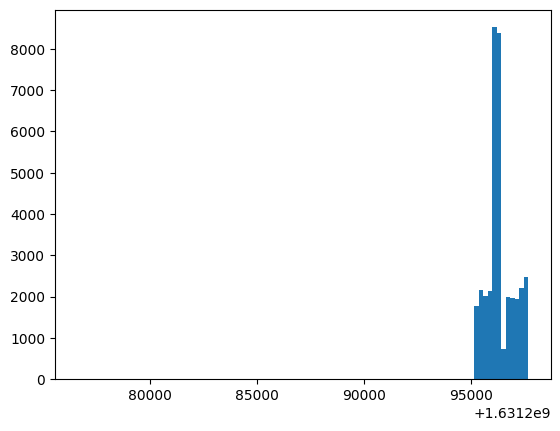

In [50]:
_timestamp_list = []

for _event in event_list:
    _timestamp_list.append(_event.get_timestamp())

plt.hist(_timestamp_list, bins=100)

event_list = event_list[2:]

## Check Event

In [51]:
# for event in auditevent_dict.values():
#     SYSCALL_flag = 0
#     for record in event.records:
#         if record.type == 'SYSCALL':
#             SYSCALL_flag = 1
#     if SYSCALL_flag == 0:
#         for record in event.records:
#             print(record.type)
#         print("_________________")


In [52]:
for record in auditd_record_list:
    if record.type == "DAEMON_START":
        # if 'pid' not in record.data_dict.keys():
        print(record.data_dict.keys())

dict_keys(['op', 'ver', 'format', 'kernel', 'auid', 'pid', 'uid', 'ses', 'res'])
dict_keys(['op', 'ver', 'format', 'kernel', 'auid', 'pid', 'uid', 'ses', 'res'])
dict_keys(['op', 'ver', 'format', 'kernel', 'auid', 'pid', 'uid', 'ses', 'res'])


Beside ANOM_PROMISCUOUS， other record contain uid also has pid

In [53]:
for record in auditd_record_list:
    if 'uid' in record.data_dict.keys():
        if 'pid' not in record.data_dict.keys():
        # if 'pid' not in record.data_dict.keys():
            print(record.type, record.data_dict.keys())

ANOM_PROMISCUOUS dict_keys(['dev', 'prom', 'old_prom', 'auid', 'uid', 'gid', 'ses'])
ANOM_PROMISCUOUS dict_keys(['dev', 'prom', 'old_prom', 'auid', 'uid', 'gid', 'ses'])
ANOM_PROMISCUOUS dict_keys(['dev', 'prom', 'old_prom', 'auid', 'uid', 'gid', 'ses'])
ANOM_PROMISCUOUS dict_keys(['dev', 'prom', 'old_prom', 'auid', 'uid', 'gid', 'ses'])
ANOM_PROMISCUOUS dict_keys(['dev', 'prom', 'old_prom', 'auid', 'uid', 'gid', 'ses'])
ANOM_PROMISCUOUS dict_keys(['dev', 'prom', 'old_prom', 'auid', 'uid', 'gid', 'ses'])
ANOM_PROMISCUOUS dict_keys(['dev', 'prom', 'old_prom', 'auid', 'uid', 'gid', 'ses'])
ANOM_PROMISCUOUS dict_keys(['dev', 'prom', 'old_prom', 'auid', 'uid', 'gid', 'ses'])
ANOM_PROMISCUOUS dict_keys(['dev', 'prom', 'old_prom', 'auid', 'uid', 'gid', 'ses'])
ANOM_PROMISCUOUS dict_keys(['dev', 'prom', 'old_prom', 'auid', 'uid', 'gid', 'ses'])
ANOM_PROMISCUOUS dict_keys(['dev', 'prom', 'old_prom', 'auid', 'uid', 'gid', 'ses'])
ANOM_PROMISCUOUS dict_keys(['dev', 'prom', 'old_prom', 'auid', 'u

Check arguments of EXECVE record

In [54]:
for record in auditd_record_list[:100]:
    if record.type == "EXECVE":
        _argc = int(record.data_dict['argc'])
        for i_arg in range(_argc):
            _arg = record.data_dict[f'a{i_arg}']
            if _arg[1] != "/":
                print(_arg)
            # if _arg[0] == "\"" and _arg[-1] == "\"":
            #     _arg = _arg[1:-1]
            #     print(_arg)

"--load"
"mktemp"
"awk"
0A424547494E2020207B0A20202020202020206D696E75735F65203D2022223B0A20202020202020206D696E75735F44203D2022223B0A20202020202020206D696E75735F66203D2022223B0A20202020202020206D696E75735F62203D2022223B0A202020202020202072657374203D20303B0A7D207B0A2020202020202020696620286C656E67746828243029203C203129207B206E6578743B207D0A2020202020202020696620286D617463682824302C20225E5C5C732A23222929207B206E6578743B207D0A2020202020202020696620286D617463682824302C20225E5C5C732A2D65222929207B206D696E75735F65203D2024303B206E6578743B207D0A2020202020202020696620286D617463682824302C20225E5C5C732A2D445C5C732A24222929207B206D696E75735F44203D2024303B206E6578743B207D0A2020202020202020696620286D617463682824302C20225E5C5C732A2D66222929207B206D696E75735F66203D2024303B206E6578743B207D0A2020202020202020696620286D617463682824302C20225E5C5C732A2D62222929207B206D696E75735F62203D2024303B206E6578743B207D0A202020202020202072756C65735B726573742B2B5D203D2024303B0A7D0A454E4420202020207B0A202020202020202070

In [55]:
num_multi_SYSCALL = 0

for event in audit_event_dict.values():
    num_SYSCALL = 0
    for record in event.records:
        if record.type == "SYSCALL":
            num_SYSCALL += 1
    if num_SYSCALL > 1:
        num_multi_SYSCALL += 1
        for record in event.records:
            print(record.type)
        print("_________________")


print(num_multi_SYSCALL)

0


In [56]:
# Each event will only have one valid pid
num_none_pid = 0

for event in audit_event_dict.values():
    pid = None
    multi_pid_flag = 0
    for record in event.records:
        if 'pid' in record.data_dict.keys():
            if pid is None:
                pid = record.data_dict['pid']
            else:
                if pid != record.data_dict['pid']:
                    multi_pid_flag = 1
    if pid is None:
        num_none_pid += 1
        print('No PID')
        for record in event.records:
            print(record.type)
        print("_________________")


print(num_none_pid)

No PID
SOCKADDR
PROCTITLE
_________________
No PID
CONFIG_CHANGE
_________________
No PID
CONFIG_CHANGE
_________________
No PID
CONFIG_CHANGE
_________________
No PID
CONFIG_CHANGE
_________________
No PID
CONFIG_CHANGE
_________________
No PID
CONFIG_CHANGE
_________________
No PID
CONFIG_CHANGE
_________________
No PID
CONFIG_CHANGE
_________________
No PID
CONFIG_CHANGE
_________________
No PID
CONFIG_CHANGE
_________________
No PID
CONFIG_CHANGE
_________________
No PID
CONFIG_CHANGE
CONFIG_CHANGE
_________________
No PID
CONFIG_CHANGE
CONFIG_CHANGE
_________________
No PID
CONFIG_CHANGE
CONFIG_CHANGE
_________________
No PID
ANOM_PROMISCUOUS
ANOM_PROMISCUOUS
_________________
No PID
ANOM_PROMISCUOUS
ANOM_PROMISCUOUS
_________________
No PID
NETFILTER_CFG
NETFILTER_CFG
_________________
No PID
NETFILTER_CFG
NETFILTER_CFG
_________________
No PID
NETFILTER_CFG
NETFILTER_CFG
_________________
No PID
NETFILTER_CFG
NETFILTER_CFG
_________________
No PID
NETFILTER_CFG
NETFILTER_CFG
___

In [57]:
num_multi = 0

for event in audit_event_dict.values():
    uid = None
    multi_flag = 0
    for record in event.records:
        if 'uid' in record.data_dict.keys():
            if uid is None:
                uid = record.data_dict['uid']
            else:
                if uid != record.data_dict['uid']:
                    multi_flag = 1

    if multi_pid_flag == 1:
        multi_flag += 1
        # print("multiple PID")
        for record in event.records:
            print(record.type, record.data)
        print("_________________")

print(num_multi)

0


In [58]:
# Time Distribution


# Auditd to Graph

Nodes are the process_id

Edges are the relationships between parent and child

## RESOURCE-INTERACTION GRAPH

In [59]:
import networkx as nx

In [60]:
# node_list = []
# edge_list = []

# # Sort the event by timestamp
# event_list = list(auditevent_dict.values())
# event_list.sort(key=lambda x:x.get_timestamp())


# for _event in event_list:
#     res = event_analyse(_event)
#     if res is not None:
#         event_node_list, event_edge_list = res
    
#     for _edge in event_edge_list:
#         _edge.i_a += len(node_list)
#         _edge.i_b += len(node_list)
    
#     node_list += event_node_list
#     edge_list += event_edge_list

In [61]:
for _node in event_list[10].node_list:
    print(_node)

Process 1631295230.777 pid:22313 
Process 1631295230.777 pid:890 
User 1631295230.777 uid:0 
Executable 1631295230.777 exe:"/usr/bin/docker-proxy" 


In [62]:
# Given timestamp range return node_list and edge_list
# The node and edge in list has sorted by timestamp

_interval = 60
_overlap = 30

graph_nodes_list = []
graph_edges_list = []

_start = event_list[0].get_timestamp()
_end = event_list[-1].get_timestamp()

base = _start
i_event = 0
i_event_overlap = None

while base <= _end:
    _node_list = []
    _edge_list = []
    
    while i_event < len(event_list) and event_list[i_event].get_timestamp() < base+_interval:
        if event_list[i_event].get_timestamp() >= base+_interval-_overlap:
            i_event_overlap = i_event

        _event = event_list[i_event]

        event_node_list = copy.deepcopy(_event.node_list)
        event_edge_list = copy.deepcopy(_event.edge_list)
        
        for _edge in event_edge_list:
            _edge.i_a += len(_node_list)
            _edge.i_b += len(_node_list)

        _node_list += event_node_list
        _edge_list += event_edge_list
        
        i_event += 1
    
    # for _node in _node_list:
    #     print(_node)
    print(f"Original Node Number: {len(_node_list)}")  

    # Integrate Node
    _integrate_map = {} # origin index: integrate index
    for i_node in range(len(_node_list)):
        if i_node in _integrate_map:
            continue
        else:
            for j_node in range(i_node+1,len(_node_list)):
                if j_node in _integrate_map:
                    continue
                else:
                    _node_i = _node_list[i_node]
                    _node_j = _node_list[j_node]
                    if _node_i == _node_j:
                        _integrate_map.update({j_node: i_node})

    _node_index = list(range(len(_node_list)))
    for i_node in sorted(list(_integrate_map.keys()),reverse=True):
        _node_list.pop(i_node)
        _node_index.pop(i_node)
    print(_node_index)
    _index_map = dict(zip(_node_index,range(len(_node_index))))
    print(_integrate_map)
    for i_edge in range(len(_edge_list)):
        _edge = _edge_list[i_edge]
        if _edge.i_a in _integrate_map:
            _edge.i_a = _integrate_map[_edge.i_a]
        if _edge.i_b in _integrate_map:
            _edge.i_b = _integrate_map[_edge.i_b]
        
        _edge.i_a = _index_map[_edge.i_a]
        _edge.i_b = _index_map[_edge.i_b]

    # for _node in node_list:
    #     print(_node)
    print(f"Integrated Node Number: {len(_node_list)}")    
    print(f"Edge Number: {len(_edge_list)}")

    #TODO Integrate Edge

    if len(_node_list) != 0:
        graph_nodes_list.append(_node_list)
        graph_edges_list.append(_edge_list)

    base = base+_interval-_overlap
    if i_event_overlap is not None:
        i_event = i_event_overlap

Original Node Number: 4
[0, 1, 2, 3]
{}
Integrated Node Number: 4
Edge Number: 3
Original Node Number: 0
[]
{}
Integrated Node Number: 0
Edge Number: 0
Original Node Number: 0
[]
{}
Integrated Node Number: 0
Edge Number: 0
Original Node Number: 0
[]
{}
Integrated Node Number: 0
Edge Number: 0
Original Node Number: 0
[]
{}
Integrated Node Number: 0
Edge Number: 0
Original Node Number: 0
[]
{}
Integrated Node Number: 0
Edge Number: 0
Original Node Number: 0
[]
{}
Integrated Node Number: 0
Edge Number: 0
Original Node Number: 0
[]
{}
Integrated Node Number: 0
Edge Number: 0
Original Node Number: 0
[]
{}
Integrated Node Number: 0
Edge Number: 0
Original Node Number: 0
[]
{}
Integrated Node Number: 0
Edge Number: 0
Original Node Number: 0
[]
{}
Integrated Node Number: 0
Edge Number: 0
Original Node Number: 0
[]
{}
Integrated Node Number: 0
Edge Number: 0
Original Node Number: 0
[]
{}
Integrated Node Number: 0
Edge Number: 0
Original Node Number: 0
[]
{}
Integrated Node Number: 0
Edge Number

In [63]:
for _node_list, _edge_list in zip(graph_nodes_list,graph_edges_list):
    max_index = 0
    for _edge in _edge_list:
        if _edge.i_a > max_index:
            max_index = _edge.i_a 
        if _edge.i_b > max_index:
            max_index = _edge.i_b
    if max_index > len(_node_list):
        print(max_index, len(_node_list)) 

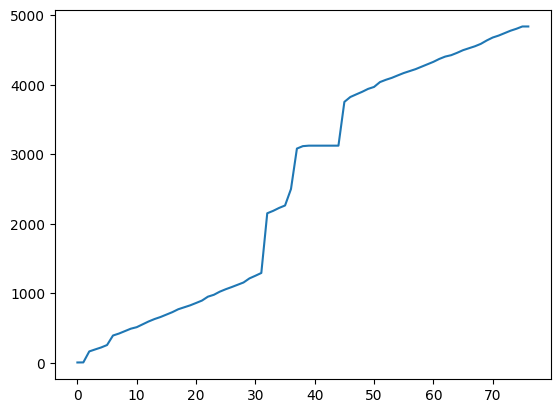

In [64]:
# Register the node to a gobal list for hidden state transfer between time slots
global_node_list = []
graph_node_indices_list = []
num_node = []

for _node_list in graph_nodes_list:
    _node_indices = []
    for _node_i in _node_list:
        flag_register = 0
        for j_node, _node_j in enumerate(global_node_list):
            if _node_i == _node_j:
                _node_indices.append(j_node)
                flag_register = 1
                break
        if flag_register == 0:
            global_node_list.append(_node_i)
            _node_indices.append(len(global_node_list)-1)
    graph_node_indices_list.append(_node_indices)
    num_node.append(len(global_node_list))

plt.plot(num_node)
    

Since the node in this task is static, so the attribute of node can be store alone gloabl node list

In [65]:
from sklearn.preprocessing import OneHotEncoder

# Node Attr
node_attr_array = None
node_attr_list = []
for _node in global_node_list:
    node_attr_list.append(_node.feature_extract())
node_attr_encoder = OneHotEncoder(sparse_output=False)
node_attr_array = node_attr_encoder.fit_transform(node_attr_list)
print('node_attr_array',node_attr_array.shape)


# Node Index
node_flag_array = None
node_index_array = None

node_flag_list = []
node_index_list = []
base = 0
for i_graph, _node_indices in enumerate(graph_node_indices_list):
    base += len(_node_indices)
    node_flag_list.append(base)
    node_index_list += _node_indices

node_index_array = np.array(node_index_list)
node_flag_array = np.array(node_flag_list)

print('node_flag_array',node_flag_array.shape)
print('node_index_array',node_index_array.shape)

# Edge
edge_flag_array = None
edge_attr_array = None
edge_index_array = None

edge_flag_list = []
edge_attr_list = []
edge_index_list = []

base = 0
for _edge_list in graph_edges_list:
    base += len(_edge_list)
    edge_flag_list.append(base)
    edge_attr_list += [_edge.feature_extract() for _edge in _edge_list]
    edge_index_list += [[_edge.i_a,_edge.i_b] for _edge in _edge_list]

edge_attr_encoder = OneHotEncoder(sparse_output=False)

edge_attr_array = edge_attr_encoder.fit_transform(edge_attr_list)
edge_index_array = np.array(edge_index_list)
edge_flag_array = np.array(edge_flag_list)

print('edge_flag_array',edge_flag_array.shape)
print('edge_attr_array',edge_attr_array.shape)
print('edge_index_array',edge_index_array.shape)

node_attr_array (4839, 5)
node_flag_array (77,)
node_index_array (7954,)
edge_flag_array (77,)
edge_attr_array (134102, 57)
edge_index_array (134102, 2)


In [66]:
import os
np.savez(
    f'../ProcessedData/test_{_interval}_{_overlap}.npz',
    node_attr_array=node_attr_array,
    node_flag_array=node_flag_array,
    node_index_array=node_index_array,
    edge_flag_array=edge_flag_array,
    edge_attr_array=edge_attr_array,
    edge_index_array=edge_index_array
    )